## Glass Classification--KNN

I will write this note as per CRISP-DM (cross-industry standard process for data mining) process. I will try to keep writing in English for code and algorithm related statements, the other sections, i may write it in Chinese for better elaboration, sorry for inconvenience if you are not Chinese-speaking friends.<br>
#### CRISP-DM Process:<br>

 - Business understanding
 - Data understanding
 - Data preparation
 - Modeling
 - Evaluation
 - Deployment

### Data set source
https://archive.ics.uci.edu/ml/datasets/Glass+Identification <br>
no missing values as per source descreption

### Business understanding

Data set  has 9 properties, the first one is optical property, the rest 8 is chemical oxide contents of glass, so property 1 and property 2-9 has different dimension.<br>
unit measurement for contents: weight percent in corresponding oxide, as are attributes
glass class has 7 types, but type 4 is not in this data set.<br>

----------
The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

---

Names in Chinese:<br>
1. building_windows_float_processed --建筑窗户-浮法玻璃 <br>
2. building_windows_non_float_processed --建筑窗户-非浮法玻璃 <br>
3. vehicle_windows_float_processed -- 车窗-浮法玻璃<br>
4. vehicle_windows_non_float_processed (none in this database) -- 车窗-非浮法玻璃<br>
5. containers -- 器皿<br>
6. tableware -- 餐具<br>
7. headlamps--车前照灯<br>


----------
Main ingredient of glass: SiO2, other contents are also oxides, such as: Na2O, CaO,K2O

### Data understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('seaborn')

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
path='../input/glass.csv'

df=pd.read_csv(path)
df.head()

glass.csv



RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [2]:
df.shape

(214, 10)

In [3]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [4]:
type=df['Type'].groupby(df['Type']).count()
type

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

### Here, we can see class data is skewed, class 1 and 2 is in the majority

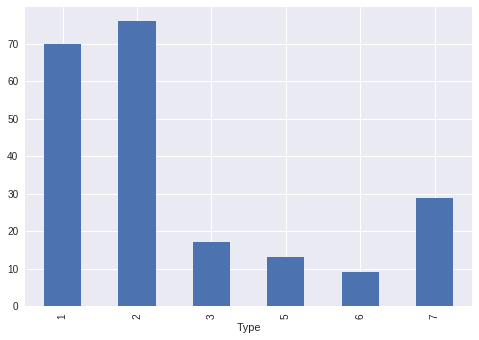

In [5]:
type.plot('bar')

### Data preparation--Do not transform intentionally<br>
For comparison, we don't make any change the initial data set<br>
Note: no missing values, so data cleaning can be ignored.

we can see precision is approx. 72%. Best K-value is 1 that means classify by nearest 1 sample neighbor.<br>
But, we got a warning "The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10." This is caused by low sample volume and skewness of data set.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# get column titles except the last column
features=df.columns[:-1].tolist()

# get data set features
X=df[features].values
# get labels
y=df['Type'].values

# split data to train data set and test data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
# store scores of KNN model by K=1 to 31
scores=[]

# loop k from 1 to 31, and get cross validation score of each K value
for k in range(1,32):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
    score_mean=score_val.mean()
    scores.append(score_mean)

# get index of maxium score along axis, default axis=0 for 1 dimensional array
best_k=np.argmax(scores)+1
print(best_k)
# generate KNN model
knn=KNeighborsClassifier(best_k)
# fit with train data set
knn.fit(X_train,y_train)
# get Modes presicion rate using test set
print("prediction precision rate:",knn.score(X_test,y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:588: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:588: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:588: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:588: Warning: The least populated class in y has only 8 members, which is too few. The minimum number 

1
prediction precision rate: 0.720930232558


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:588: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:588: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:588: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:588: Warning: The least populated class in y has only 8 members, which is too few. The minimum number 

### Data preparation--Do not transform intentionally<br>
### Now we try to solve below problems:<br>
- low data set volume
- skewness

### Get balanced sample by oversampling

In [7]:
df3=df[df['Type']==3]

In [8]:
df3=pd.concat([df3]*4)

In [9]:
df5=df[df['Type']==5]

In [10]:
df5=pd.concat([df5]*5)

In [11]:
df6=df[df['Type']==6]

In [12]:
df6=pd.concat([df6]*7)

In [13]:
df7=df[df['Type']==7]

In [14]:
df7=pd.concat([df7]*2)

In [15]:
df1=df[df['Type']==1]

In [16]:
df2=df[df['Type']==2]

In [17]:
df_balanced=pd.concat([df1,df2,df3,df5,df6,df7])

In [18]:
df_balanced.shape

(400, 10)

In [19]:
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [20]:
type=df_balanced['Type'].groupby(df_balanced['Type']).count()
type

Type
1    70
2    76
3    68
5    65
6    63
7    58
Name: Type, dtype: int64

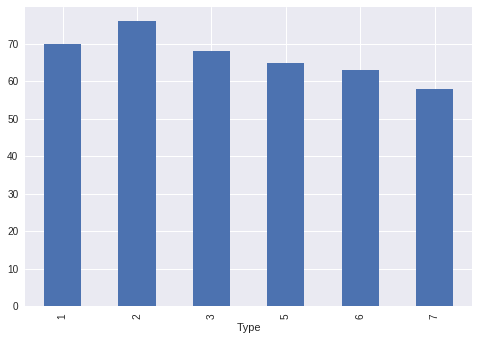

In [21]:
type.plot('bar')

### Now we try to model again

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# df.columns is column labels property
features=df_balanced.columns[:-1].tolist()
X=df_balanced[features].values
y=df_balanced['Type']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
score=[]
for i in range(32):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
    score_mean=score_val.mean()
    scores.append(score_mean)
best_K=np.argmax(scores)+1
print('best K is:',best_K)
knn=KNeighborsClassifier(best_K)
knn.fit(X_train,y_train)
print("prediction precision rate:",knn.score(X_test,y_test))


best K is: 1
prediction precision rate: 0.9


Now, you can see, no warning occurs, and precision rate grows to 90%

### Further data exploring
Usually data mining is a constantly trying and improvement action, we may go back and forth between data exploring and modeling, so now we will try to exposure more details of this data set

We use box plot to describe the value range of each features<br>
we find a fact, Silicon oxides is main contents of glass, its wight percent is much higher than other contents.<br>
for this kind of data, we usually normalize it to same scale for **possible** better model results<br>
Note: it is possible, not absolute, to improve the classifier performance

### Model again, but normalize feature values before train

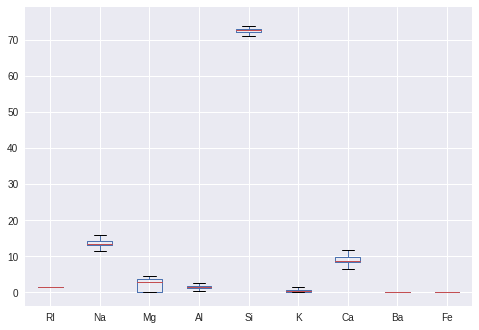

In [23]:
df_balanced.iloc[:,:-1].boxplot()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# df.columns is column labels property
features=df_balanced.columns[:-1].tolist()
X=df_balanced[features].values
y=df_balanced['Type']

# normalization
min_max_scaler=preprocessing.MinMaxScaler()
X_minmax=min_max_scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_minmax,y,test_size=0.2,random_state=1)
score=[]
for i in range(32):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
    score_mean=score_val.mean()
    scores.append(score_mean)
best_K=np.argmax(scores)+1
print('best K is:',best_K)
knn=KNeighborsClassifier(best_K)
knn.fit(X_train,y_train)
print("prediction precision rate:",knn.score(X_test,y_test))

best K is: 1
prediction precision rate: 0.9


We find normalization on this data set has no improvement on performance

In [25]:
X

array([[  1.52101,  13.64   ,   4.49   , ...,   8.75   ,   0.     ,   0.     ],
       [  1.51761,  13.89   ,   3.6    , ...,   7.83   ,   0.     ,   0.     ],
       [  1.51618,  13.53   ,   3.55   , ...,   7.78   ,   0.     ,   0.     ],
       ..., 
       [  1.52065,  14.36   ,   0.     , ...,   8.44   ,   1.64   ,   0.     ],
       [  1.51651,  14.38   ,   0.     , ...,   8.48   ,   1.57   ,   0.     ],
       [  1.51711,  14.23   ,   0.     , ...,   8.62   ,   1.67   ,   0.     ]])

In [26]:
X_minmax

array([[ 0.43283582,  0.43759398,  1.        , ...,  0.30855019,
         0.        ,  0.        ],
       [ 0.28358209,  0.47518797,  0.80178174, ...,  0.22304833,
         0.        ,  0.        ],
       [ 0.22080773,  0.42105263,  0.79064588, ...,  0.21840149,
         0.        ,  0.        ],
       ..., 
       [ 0.41703248,  0.54586466,  0.        , ...,  0.27973978,
         0.52063492,  0.        ],
       [ 0.23529412,  0.54887218,  0.        , ...,  0.28345725,
         0.4984127 ,  0.        ],
       [ 0.26163301,  0.52631579,  0.        , ...,  0.2964684 ,
         0.53015873,  0.        ]])

### Dive into the data again--PCA-- Dimensionality Reduction
The prerequisity of PCA is hihg correlation among features, so we need to get correlation matrix before trying PCA

### 样本量较少是否可以做PCA主成分分析?<br>
主成分分析的目的是把高维数据降到低维度，同时尽可能多的解释样本方差，通常，我们需要的是在样本足够多的情况下找到使得累计贡献率达到85%以上的较少的主成分**。但是，在样本量较少的情况下，2-3个主成分的累计贡献率往往很大，简单而言就是很容易找到涵盖这些样本的特征；样本增加，多样性增加，累计贡献率就往往会下降。
另外，样本量较少的情况下，这个样本可能不能准确的反映总体的情况，因为样本容量太小的话，你很容易获得一组数据，他们“偶然”近似落在同一个平面上。比如在较小样本上把数据点投影到某个二维平面上能保有绝大部分方差，但当我搜集大量数据之后发现，许多点其实并不落在这个平面附近，反而离它很远。之前只是因为数据过少而造成的巧合。<br>
有一个基本原则：只要不超过计算能力的限制，在任何估计参数的时候，样本容量都是越大越好。中心极限定理已经证明了。
上面是对于样本量小的理解，另一个角度是维度小，即数据集的特征数并不多，即维度并不高，如果他们之间的相关性也不高，那么可以不进行PCA降维。<br>
那么对于这个数据集是否可以使用PCA, 答案是可以尝试，然后看下效果，效果变差了，放弃即可，不应该简单否定PCA的作用，因为这个数据集有两类属性，折射率和成分，且成分里还分硅氧化物和其他氧化物，玻璃的主要成分就是硅。<br>
[在主成分分析法中，是否对样本容量的多少有规定?][1]
  [1]: https://www.zhihu.com/question/20998460

In [27]:
df_balanced.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [28]:
corr=df_balanced.iloc[:,:-1].corr()
corr

RI        Na        Mg        Al        Si         K        Ca  \
RI  1.000000 -0.284441  0.004737 -0.317911 -0.382616 -0.315057  0.781682   
Na -0.284441  1.000000 -0.296557 -0.026838  0.127332 -0.263294 -0.302353   
Mg  0.004737 -0.296557  1.000000 -0.423804 -0.243877 -0.100156 -0.369272   
Al -0.317911 -0.026838 -0.423804  1.000000 -0.277378  0.454911 -0.222487   
Si -0.382616  0.127332 -0.243877 -0.277378  1.000000 -0.396520 -0.013017   
K  -0.315057 -0.263294 -0.100156  0.454911 -0.396520  1.000000 -0.338042   
Ca  0.781682 -0.302353 -0.369272 -0.222487 -0.013017 -0.338042  1.000000   
Ba -0.076830  0.275598 -0.330260  0.465260 -0.149315 -0.003945 -0.257840   
Fe  0.196427 -0.197842  0.134112 -0.057563 -0.101510 -0.032446  0.078362   

          Ba        Fe  
RI -0.076830  0.196427  
Na  0.275598 -0.197842  
Mg -0.330260  0.134112  
Al  0.465260 -0.057563  
Si -0.149315 -0.101510  
K  -0.003945 -0.032446  
Ca -0.257840  0.078362  
Ba  1.000000 -0.054991  
Fe -0.054991  1.000000

We can find correlation index is high, but not too much, only RI and Ca is 0.78.<br>
We will apply PCA method for learningintention.

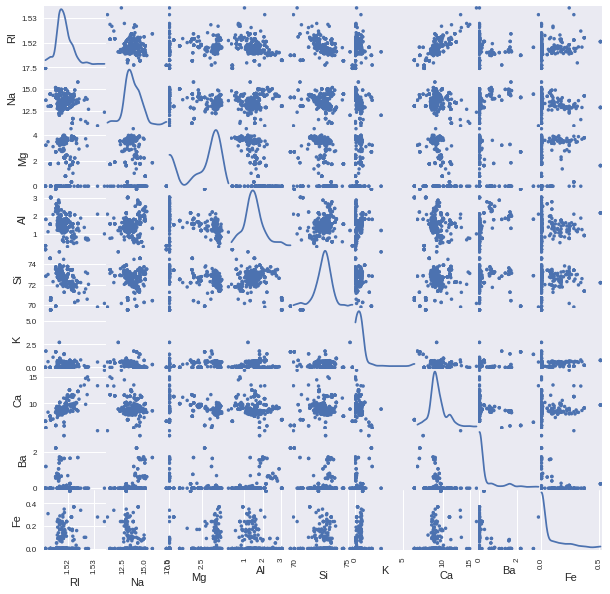

In [29]:
from pandas.plotting import scatter_matrix
sm=scatter_matrix(df_balanced.iloc[:,:-1], alpha=1, figsize=(10, 10), diagonal='kde')



After testing, PCA action not always improve the accuracy of model.Here, I just precision rate=93.75%, but, please note, it is not a stable performance, if you change "test_size" or "random_state" values, performance will drop.
So this model has some risk of overfitting.
And, please be advised: the purpose of PCA or other dimensionality reduction action is not to improve performace, it is to reduce calculation volume, it is to extract essential components of sample, it may or may not improve performance.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import decomposition

# df.columns is column labels property
features=df_balanced.columns[:-1].tolist()
X=df_balanced[features].values
y=df_balanced['Type']

# PCA
pca=decomposition.PCA(n_components=7)
pca.fit(X)
X=pca.transform(X)
print("Primary Components:",X)

# normalization
min_max_scaler=preprocessing.MinMaxScaler()
X_minmax=min_max_scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_minmax,y,test_size=0.2,random_state=1)
score=[]
for i in range(32):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
    score_mean=score_val.mean()
    scores.append(score_mean)
best_K=np.argmax(scores)+1
print('best K is:',best_K)
knn=KNeighborsClassifier(best_K)
knn.fit(X_train,y_train)
print("prediction precision rate:",knn.score(X_test,y_test))
result=knn.predict(X_test)
print(result)
myarray = np.asarray(y_test.tolist())
print(myarray)

Primary Components: [[-2.01426252  1.28353143 -0.25449366 ..., -0.08084684 -0.02643571
  -0.0652545 ]
 [-1.84924571 -0.10335078 -0.52251554 ..., -0.17373319 -0.11575363
  -0.04901632]
 [-1.81166067 -0.05203808 -0.49506806 ...,  0.10236114 -0.22578143
  -0.04444214]
 ..., 
 [ 1.46001798 -2.16363643 -0.86293602 ...,  1.10736081  0.53594359
  -0.02589243]
 [ 1.5035681  -2.1274873  -0.97946462 ...,  1.00713077  0.54571385
  -0.03293083]
 [ 1.5658326  -2.01504168 -0.73559599 ...,  1.1889275   0.52487318
  -0.03662257]]
best K is: 1
prediction precision rate: 0.9375
[7 2 6 6 3 7 3 6 3 6 3 7 3 6 6 5 7 1 2 5 2 5 7 5 3 2 7 3 7 3 2 2 3 5 1 2 2
 1 7 2 5 3 3 1 7 2 7 6 6 5 1 5 5 1 6 6 5 2 5 7 2 1 5 5 7 5 2 6 5 6 5 2 7 7
 1 7 1 3 2 5]
[7 2 6 6 3 7 3 6 1 6 3 7 3 6 6 5 7 1 2 5 2 5 7 5 1 2 7 3 7 3 2 1 3 5 1 2 1
 2 7 2 5 3 3 1 7 2 7 6 6 5 1 5 5 1 6 6 5 2 5 7 2 1 5 5 7 5 2 6 5 6 5 2 7 7
 1 7 1 3 2 5]


### what I am doing here?
because we used oversampling method to get balanced data set, so the test set must contains duplicated samples, this will affect scores of model, so i just remove duplicated samples and get scores again.

In [31]:
s=pd.DataFrame(X_test)
t=pd.DataFrame(y_test)
s.head()

0         1         2         3         4         5         6
0  0.518406  0.237484  0.311651  0.502153  0.603870  0.495972  0.126340
1  0.185147  0.576210  0.442104  0.505571  0.429470  0.241036  0.279062
2  0.316859  0.318050  0.224092  0.653193  0.368806  0.191053  0.166698
3  0.672422  0.466837  0.402936  0.402942  0.384028  0.086941  0.136887
4  0.215232  0.563080  0.401137  0.557090  0.390471  0.316590  0.081619

In [32]:
t=t.reset_index()

In [33]:
t.head()

index  Type
0    212     7
1    125     2
2    180     6
3    182     6
4    155     3

In [34]:
del t['index']

In [35]:
t.head()

Type
0     7
1     2
2     6
3     6
4     3

In [36]:
X_test_u=pd.concat([s,t],axis=1)
X_test_u=X_test_u.drop_duplicates()
X_test_u.shape

(66, 8)

In [37]:
X_test=X_test_u.iloc[:,:-1].values
y_test=X_test_u['Type']

In [38]:
print("prediction precision rate:",knn.score(X_test,y_test))
result=knn.predict(X_test)
print(result)
myarray = np.asarray(y_test.tolist())
print(myarray)

prediction precision rate: 0.924242424242
[7 2 6 6 3 7 3 6 3 6 3 7 3 6 5 1 2 5 2 5 7 3 2 7 3 7 3 2 2 3 1 2 2 1 7 2 3
 1 7 2 7 6 6 5 1 5 1 6 5 2 5 2 1 5 7 5 2 5 2 7 7 1 7 1 2 5]
[7 2 6 6 3 7 3 6 1 6 3 7 3 6 5 1 2 5 2 5 7 1 2 7 3 7 3 2 1 3 1 2 1 2 7 2 3
 1 7 2 7 6 6 5 1 5 1 6 5 2 5 2 1 5 7 5 2 5 2 7 7 1 7 1 2 5]
